# 📏 Loss Functions - Measuring How Wrong We Are

Welcome back! In our journey so far, we've learned:
- What neural networks are (Notebook 1)
- How neurons work (Notebook 2)
- Activation functions (Notebook 3)
- Creating layers (Notebook 4)
- Forward propagation (Notebook 5)

Now we can make predictions... but they're terrible! Why? Because our weights are random.

**The Big Question**: How do we measure how wrong our predictions are?

**The Answer**: Loss Functions! 🎯

## 🎯 What You'll Learn

By the end of this notebook, you'll understand:
- What loss functions are and why we need them
- Mean Squared Error (MSE) for regression
- Binary Cross-Entropy for binary classification
- Categorical Cross-Entropy for multi-class problems
- How to choose the right loss function
- Visualizing loss landscapes

**Prerequisites:** Notebooks 1-5, understanding of predictions and targets.

In [2]:
# Import our essential tools
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch

%matplotlib inline

np.random.seed(42)

print("✅ Libraries imported successfully!")
print("📦 NumPy version:", np.__version__)

✅ Libraries imported successfully!
📦 NumPy version: 1.26.4


---
## 🤔 Part 1: Why Do We Need Loss Functions?

### 🎓 The Report Card Analogy

Think of a loss function like a teacher grading your test:
- **Your Answer**: What the network predicted
- **Correct Answer**: What the actual target is
- **Score**: How far off you were (the loss)

The **lower the loss**, the **better the predictions**!

### 🗺️ The GPS Analogy

Imagine you're trying to reach a destination:
- **Current Position**: Your prediction
- **Destination**: The target value
- **Distance**: The loss (how far you are from the goal)

Your goal: **Minimize the distance** (loss) to reach the destination!

### 📊 Why Loss Functions Are Critical

Our network needs loss functions to:
1. **Quantify errors**: Turn "bad prediction" into a specific number
2. **Compare predictions**: Know which weights are better
3. **Guide learning**: Tell the network which direction to improve
4. **Track progress**: Monitor if training is working

Without loss functions, the network has no way to improve!

In [3]:
# Let's start with a simple example to understand the concept

print("🎯 SIMPLE EXAMPLE: Why We Need Loss Functions\n")
print("="*70)

# Scenario: Predicting house prices
actual_price = 300000  # The real house price is $300,000

# Let's try three different predictions
prediction_1 = 295000  # Pretty good!
prediction_2 = 350000  # Too high
prediction_3 = 200000  # Way too low

print("\n📍 ACTUAL HOUSE PRICE: $300,000")
print("\n🔮 Our predictions:")
print(f"   Prediction 1: ${prediction_1:,}")
print(f"   Prediction 2: ${prediction_2:,}")
print(f"   Prediction 3: ${prediction_3:,}")

# Calculate errors (how far off we are)
error_1 = prediction_1 - actual_price
error_2 = prediction_2 - actual_price
error_3 = prediction_3 - actual_price

print("\n❌ Raw errors (prediction - actual):")
print(f"   Error 1: ${error_1:,} (off by ${abs(error_1):,})")
print(f"   Error 2: ${error_2:,} (off by ${abs(error_2):,})")
print(f"   Error 3: ${error_3:,} (off by ${abs(error_3):,})")

# Problem: Negative and positive errors can cancel out!
average_error = (error_1 + error_2 + error_3) / 3
print(f"\n⚠️  Average error: ${average_error:,.2f}")
print("    Problem: Positive and negative errors cancel out!")

# Solution: Square the errors (all become positive)
squared_error_1 = error_1 ** 2
squared_error_2 = error_2 ** 2
squared_error_3 = error_3 ** 2

print("\n✅ Squared errors (always positive):")
print(f"   Squared Error 1: ${squared_error_1:,}")
print(f"   Squared Error 2: ${squared_error_2:,}")
print(f"   Squared Error 3: ${squared_error_3:,}")

# Calculate mean squared error
mean_squared_error = (squared_error_1 + squared_error_2 + squared_error_3) / 3
print(f"\n📊 Mean Squared Error (MSE): ${mean_squared_error:,.2f}")
print("    This is our LOSS - we want to minimize it!")

print("\n" + "="*70)
print("\n💡 KEY INSIGHT:")
print("   • Loss functions convert prediction errors into a single number")
print("   • This number tells us how 'bad' our predictions are")
print("   • Lower loss = better predictions")
print("   • The goal of training: MINIMIZE THE LOSS!")
print("="*70)

🎯 SIMPLE EXAMPLE: Why We Need Loss Functions


📍 ACTUAL HOUSE PRICE: $300,000

🔮 Our predictions:
   Prediction 1: $295,000
   Prediction 2: $350,000
   Prediction 3: $200,000

❌ Raw errors (prediction - actual):
   Error 1: $-5,000 (off by $5,000)
   Error 2: $50,000 (off by $50,000)
   Error 3: $-100,000 (off by $100,000)

⚠️  Average error: $-18,333.33
    Problem: Positive and negative errors cancel out!

✅ Squared errors (always positive):
   Squared Error 1: $25,000,000
   Squared Error 2: $2,500,000,000
   Squared Error 3: $10,000,000,000

📊 Mean Squared Error (MSE): $4,175,000,000.00
    This is our LOSS - we want to minimize it!


💡 KEY INSIGHT:
   • Loss functions convert prediction errors into a single number
   • This number tells us how 'bad' our predictions are
   • Lower loss = better predictions
   • The goal of training: MINIMIZE THE LOSS!


---
## 📊 Part 2: Mean Squared Error (MSE)

### 🎯 Use Case: Regression Problems

**When to use MSE**: Predicting **continuous numbers** like:
- House prices ($200,000, $350,000, etc.)
- Temperature (72°F, 85°F, etc.)
- Stock prices ($150.25, $200.50, etc.)
- Age (25, 47, 63, etc.)

### 📐 The Formula

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{predicted}} - y_{\text{actual}})^2$$

In plain English:
1. For each prediction: calculate (predicted - actual)
2. Square it (makes all errors positive)
3. Take the average of all squared errors

### 🔍 Why Square the Errors?

1. **Makes all errors positive**: -5 and +5 both become 25
2. **Penalizes large errors more**: Error of 10 → 100, but error of 2 → 4
3. **Mathematically nice**: Easy to take derivatives (needed for learning)

In [4]:
# Implement Mean Squared Error with detailed explanations

def mean_squared_error(y_true, y_pred, verbose=False):
    """
    Calculate Mean Squared Error (MSE) for regression problems.
    
    MSE measures the average squared difference between predictions and actual values.
    Lower MSE = better predictions.
    
    Parameters:
    - y_true: Actual values (ground truth)
    - y_pred: Predicted values
    - verbose: If True, print detailed calculations
    
    Returns:
    - mse: Mean Squared Error (scalar)
    
    Formula: MSE = (1/n) × Σ(predicted - actual)²
    """
    # Convert to numpy arrays for easy math
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    if verbose:
        print("📊 CALCULATING MSE - Step by Step")
        print("="*70)
        print(f"\nNumber of samples: {len(y_true)}")
        print(f"\nActual values:    {y_true}")
        print(f"Predicted values: {y_pred}")
    
    # Step 1: Calculate errors (prediction - actual)
    errors = y_pred - y_true
    
    if verbose:
        print(f"\nStep 1 - Errors (pred - actual): {errors}")
    
    # Step 2: Square the errors (makes them all positive)
    squared_errors = errors ** 2
    
    if verbose:
        print(f"Step 2 - Squared errors:         {squared_errors}")
    
    # Step 3: Calculate the mean (average) of squared errors
    mse = np.mean(squared_errors)
    
    if verbose:
        print(f"\nStep 3 - Mean of squared errors: {mse:.4f}")
        print("\n" + "="*70)
        print(f"\n✅ MEAN SQUARED ERROR (MSE): {mse:.4f}")
        print("   Lower is better!")
        print("="*70)
    
    return mse

print("✅ MSE function defined!")
print("   Use this for: regression problems (predicting continuous numbers)")

✅ MSE function defined!
   Use this for: regression problems (predicting continuous numbers)


In [5]:
# Example 1: Good predictions (low MSE)
print("\n🎯 EXAMPLE 1: Good Predictions\n")

actual_temps = [72, 75, 68, 80, 77]  # Actual temperatures
good_predictions = [71, 76, 69, 79, 78]  # Pretty close!

mse_good = mean_squared_error(actual_temps, good_predictions, verbose=True)

print("\n" + "="*70)

# Example 2: Bad predictions (high MSE)
print("\n🎯 EXAMPLE 2: Bad Predictions\n")

bad_predictions = [65, 82, 60, 90, 70]  # Way off!

mse_bad = mean_squared_error(actual_temps, bad_predictions, verbose=True)

# Compare
print("\n" + "="*70)
print("📊 COMPARISON")
print("="*70)
print(f"\nGood predictions MSE: {mse_good:.4f}")
print(f"Bad predictions MSE:  {mse_bad:.4f}")
print(f"\nThe bad predictions have {mse_bad/mse_good:.1f}x higher loss!")
print("\n💡 Lower MSE = Better predictions")
print("="*70)


🎯 EXAMPLE 1: Good Predictions

📊 CALCULATING MSE - Step by Step

Number of samples: 5

Actual values:    [72 75 68 80 77]
Predicted values: [71 76 69 79 78]

Step 1 - Errors (pred - actual): [-1  1  1 -1  1]
Step 2 - Squared errors:         [1 1 1 1 1]

Step 3 - Mean of squared errors: 1.0000


✅ MEAN SQUARED ERROR (MSE): 1.0000
   Lower is better!


🎯 EXAMPLE 2: Bad Predictions

📊 CALCULATING MSE - Step by Step

Number of samples: 5

Actual values:    [72 75 68 80 77]
Predicted values: [65 82 60 90 70]

Step 1 - Errors (pred - actual): [-7  7 -8 10 -7]
Step 2 - Squared errors:         [ 49  49  64 100  49]

Step 3 - Mean of squared errors: 62.2000


✅ MEAN SQUARED ERROR (MSE): 62.2000
   Lower is better!

📊 COMPARISON

Good predictions MSE: 1.0000
Bad predictions MSE:  62.2000

The bad predictions have 62.2x higher loss!

💡 Lower MSE = Better predictions



📈 VISUALIZING MSE



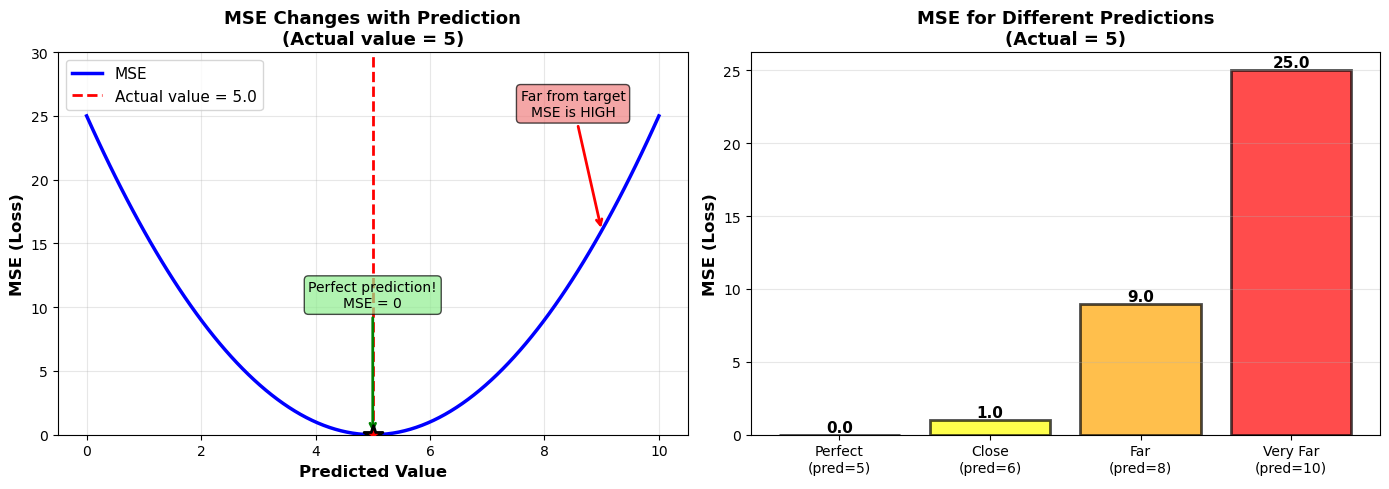


💡 Key Observations:
   • MSE forms a parabola (U-shape)
   • Minimum at the actual value (perfect prediction)
   • Grows quickly as you move away from the target
   • Large errors are penalized more than small errors


In [6]:
# Visualize how MSE changes with prediction errors

print("\n📈 VISUALIZING MSE\n")

# Let's say the actual value is 5
actual_value = 5.0

# Try many different predictions from 0 to 10
predictions = np.linspace(0, 10, 100)

# Calculate MSE for each prediction
mse_values = [(pred - actual_value)**2 for pred in predictions]

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: MSE vs Prediction
ax1.plot(predictions, mse_values, 'b-', linewidth=2.5, label='MSE')
ax1.axvline(x=actual_value, color='red', linestyle='--', linewidth=2, label=f'Actual value = {actual_value}')
ax1.scatter([actual_value], [0], color='red', s=200, zorder=5, marker='*', edgecolors='black', linewidth=2)
ax1.set_xlabel('Predicted Value', fontsize=12, fontweight='bold')
ax1.set_ylabel('MSE (Loss)', fontsize=12, fontweight='bold')
ax1.set_title('MSE Changes with Prediction\n(Actual value = 5)', fontsize=13, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 30])

# Add annotations
ax1.annotate('Perfect prediction!\nMSE = 0', xy=(5, 0), xytext=(5, 10),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=10, ha='center', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

ax1.annotate('Far from target\nMSE is HIGH', xy=(9, 16), xytext=(8.5, 25),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=10, ha='center', bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

# Plot 2: Comparing different prediction scenarios
scenarios = ['Perfect\n(pred=5)', 'Close\n(pred=6)', 'Far\n(pred=8)', 'Very Far\n(pred=10)']
scenario_preds = [5, 6, 8, 10]
scenario_mse = [(p - actual_value)**2 for p in scenario_preds]
colors = ['green', 'yellow', 'orange', 'red']

bars = ax2.bar(scenarios, scenario_mse, color=colors, edgecolor='black', linewidth=2, alpha=0.7)
ax2.set_ylabel('MSE (Loss)', fontsize=12, fontweight='bold')
ax2.set_title('MSE for Different Predictions\n(Actual = 5)', fontsize=13, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, mse in zip(bars, scenario_mse):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{mse:.1f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('mse_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 Key Observations:")
print("   • MSE forms a parabola (U-shape)")
print("   • Minimum at the actual value (perfect prediction)")
print("   • Grows quickly as you move away from the target")
print("   • Large errors are penalized more than small errors")

### 💡 When to Use MSE

**✅ Use MSE for:**
- Regression problems (predicting continuous values)
- When you want to penalize large errors heavily
- When your data doesn't have extreme outliers
- House price prediction
- Temperature forecasting
- Stock price prediction

**❌ Don't use MSE for:**
- Classification problems (use cross-entropy instead)
- When your data has extreme outliers (they'll dominate the loss)
- When you want to interpret loss in the same units as your data (use MAE instead)

**⚠️ Things to Watch Out For:**
- MSE is sensitive to outliers (large errors are squared!)
- Units are squared (e.g., predicting prices in dollars → MSE in dollars²)
- Large MSE values might need scaling for numerical stability

---
## 🔀 Part 3: Binary Cross-Entropy (BCE)

### 🎯 Use Case: Binary Classification

**When to use BCE**: Classifying into **TWO classes**:
- Spam vs Not Spam
- Cat vs Dog
- Fraud vs Legitimate
- Disease vs Healthy

### 📐 The Formula

$$\text{BCE} = -\frac{1}{n} \sum_{i=1}^{n} [y_i \cdot \log(p_i) + (1-y_i) \cdot \log(1-p_i)]$$

Where:
- $y$ = actual label (0 or 1)
- $p$ = predicted probability (0 to 1)

### 🤔 Why Not Use MSE for Classification?

MSE doesn't work well for classification because:
1. **Probability interpretation**: We want to measure how confident predictions are
2. **Better gradients**: BCE gives clearer signals for learning
3. **Proper scoring**: Rewards confident correct predictions, heavily penalizes confident wrong predictions

### 💭 Intuition

Binary Cross-Entropy measures **how surprised we are** by the prediction:
- Predict 0.99 when actual is 1 → Small loss (good!)
- Predict 0.01 when actual is 1 → Huge loss (terrible!)
- Predict 0.50 → Medium loss (uncertain)

In [7]:
# Implement Binary Cross-Entropy with detailed explanations

def binary_cross_entropy(y_true, y_pred, epsilon=1e-15, verbose=False):
    """
    Calculate Binary Cross-Entropy (BCE) for binary classification.
    
    BCE measures how well predicted probabilities match actual binary labels.
    Lower BCE = better predictions.
    
    Parameters:
    - y_true: Actual labels (0 or 1)
    - y_pred: Predicted probabilities (between 0 and 1)
    - epsilon: Small number to prevent log(0) errors
    - verbose: If True, print detailed calculations
    
    Returns:
    - bce: Binary Cross-Entropy (scalar)
    
    Formula: BCE = -[y×log(p) + (1-y)×log(1-p)]
    """
    # Convert to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Clip predictions to prevent log(0) which is undefined
    # This prevents numerical instability
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    
    if verbose:
        print("📊 CALCULATING BINARY CROSS-ENTROPY - Step by Step")
        print("="*70)
        print(f"\nNumber of samples: {len(y_true)}")
        print(f"\nActual labels (0 or 1):      {y_true}")
        print(f"Predicted probabilities (0-1): {y_pred}")
    
    # Calculate loss for each sample
    # When y_true=1: loss = -log(y_pred)
    # When y_true=0: loss = -log(1-y_pred)
    loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    if verbose:
        print(f"\nPer-sample losses: {loss}")
        print("\nBreakdown for each sample:")
        for i in range(len(y_true)):
            if y_true[i] == 1:
                print(f"  Sample {i}: y=1, p={y_pred[i]:.3f} → loss=-log({y_pred[i]:.3f})={loss[i]:.4f}")
            else:
                print(f"  Sample {i}: y=0, p={y_pred[i]:.3f} → loss=-log({1-y_pred[i]:.3f})={loss[i]:.4f}")
    
    # Take the average
    bce = np.mean(loss)
    
    if verbose:
        print("\n" + "="*70)
        print(f"\n✅ BINARY CROSS-ENTROPY (BCE): {bce:.4f}")
        print("   Lower is better!")
        print("="*70)
    
    return bce

print("✅ Binary Cross-Entropy function defined!")
print("   Use this for: binary classification (2 classes)")

✅ Binary Cross-Entropy function defined!
   Use this for: binary classification (2 classes)


In [8]:
# Example: Email spam detection

print("\n📧 EXAMPLE: Email Spam Detection\n")
print("="*70)
print("Task: Classify emails as Spam (1) or Not Spam (0)")
print("="*70)

# Actual labels
actual_labels = [1, 0, 1, 1, 0]  # 1=Spam, 0=Not Spam

# Scenario 1: Good predictions (confident and correct)
print("\n🎯 SCENARIO 1: Good Predictions (Confident & Correct)\n")
good_predictions = [0.95, 0.05, 0.90, 0.88, 0.10]  # High confidence, mostly correct

bce_good = binary_cross_entropy(actual_labels, good_predictions, verbose=True)

# Scenario 2: Bad predictions (confident but wrong)
print("\n" + "="*70)
print("\n🎯 SCENARIO 2: Bad Predictions (Confident but WRONG)\n")
bad_predictions = [0.10, 0.90, 0.15, 0.20, 0.85]  # Confidently wrong!

bce_bad = binary_cross_entropy(actual_labels, bad_predictions, verbose=True)

# Scenario 3: Uncertain predictions
print("\n" + "="*70)
print("\n🎯 SCENARIO 3: Uncertain Predictions (All around 0.5)\n")
uncertain_predictions = [0.50, 0.50, 0.50, 0.50, 0.50]  # No confidence

bce_uncertain = binary_cross_entropy(actual_labels, uncertain_predictions, verbose=True)

# Compare all scenarios
print("\n" + "="*70)
print("📊 COMPARISON OF ALL SCENARIOS")
print("="*70)
print(f"\nGood predictions (confident & correct): BCE = {bce_good:.4f} ✅ BEST")
print(f"Uncertain predictions (all ~0.5):       BCE = {bce_uncertain:.4f}")
print(f"Bad predictions (confident but wrong):  BCE = {bce_bad:.4f} ❌ WORST")

print("\n💡 Key Insight:")
print("   • Confident correct predictions → Low BCE (good!)")
print("   • Uncertain predictions → Medium BCE")
print("   • Confident wrong predictions → High BCE (bad!)")
print("\n   BCE heavily penalizes confident mistakes!")
print("="*70)


📧 EXAMPLE: Email Spam Detection

Task: Classify emails as Spam (1) or Not Spam (0)

🎯 SCENARIO 1: Good Predictions (Confident & Correct)

📊 CALCULATING BINARY CROSS-ENTROPY - Step by Step

Number of samples: 5

Actual labels (0 or 1):      [1 0 1 1 0]
Predicted probabilities (0-1): [0.95 0.05 0.9  0.88 0.1 ]

Per-sample losses: [0.05129329 0.05129329 0.10536052 0.12783337 0.10536052]

Breakdown for each sample:
  Sample 0: y=1, p=0.950 → loss=-log(0.950)=0.0513
  Sample 1: y=0, p=0.050 → loss=-log(0.950)=0.0513
  Sample 2: y=1, p=0.900 → loss=-log(0.900)=0.1054
  Sample 3: y=1, p=0.880 → loss=-log(0.880)=0.1278
  Sample 4: y=0, p=0.100 → loss=-log(0.900)=0.1054


✅ BINARY CROSS-ENTROPY (BCE): 0.0882
   Lower is better!


🎯 SCENARIO 2: Bad Predictions (Confident but WRONG)

📊 CALCULATING BINARY CROSS-ENTROPY - Step by Step

Number of samples: 5

Actual labels (0 or 1):      [1 0 1 1 0]
Predicted probabilities (0-1): [0.1  0.9  0.15 0.2  0.85]

Per-sample losses: [2.30258509 2.30258509 


📈 VISUALIZING BINARY CROSS-ENTROPY



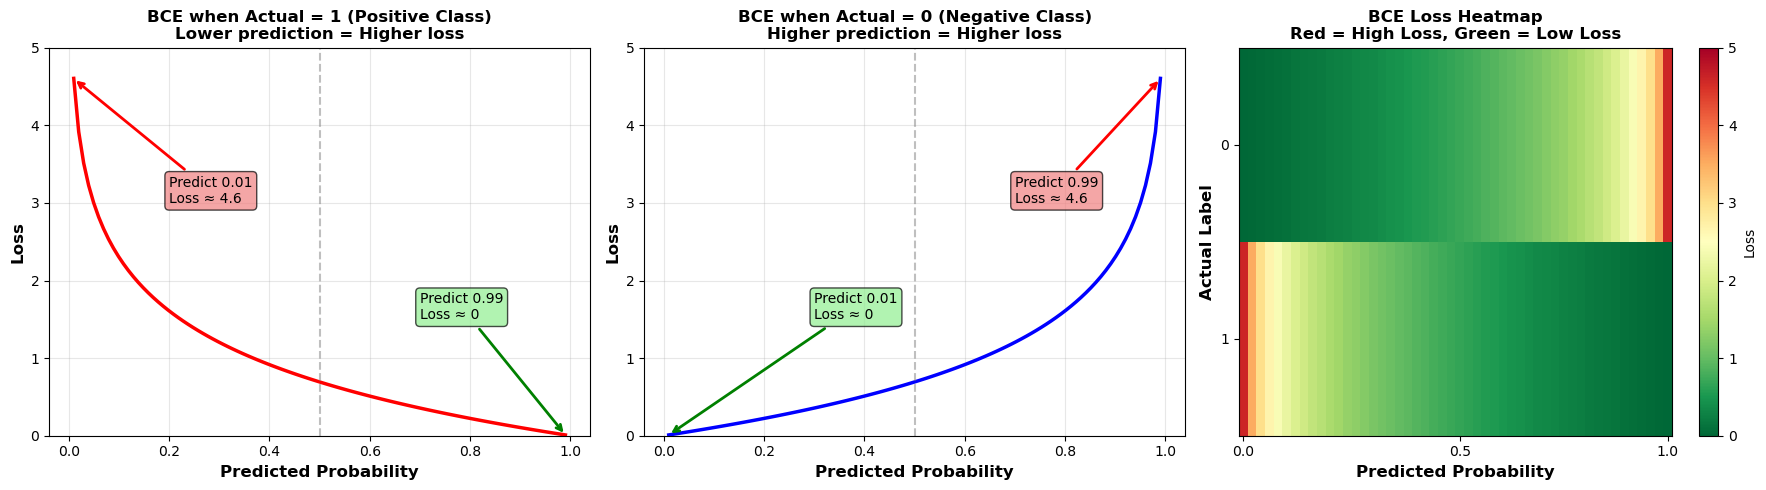


💡 Key Observations:
   • When actual=1: Want predictions close to 1 (red curve)
   • When actual=0: Want predictions close to 0 (blue curve)
   • Loss shoots up when you're confidently wrong!
   • Loss is moderate when uncertain (prediction ≈ 0.5)
   • Heatmap shows: Green=good, Red=bad


In [9]:
# Visualize Binary Cross-Entropy

print("\n📈 VISUALIZING BINARY CROSS-ENTROPY\n")

# Create prediction values from 0.01 to 0.99
predictions = np.linspace(0.01, 0.99, 100)

# Calculate BCE for two cases:
# Case 1: Actual label is 1 (positive class)
bce_when_actual_is_1 = -np.log(predictions)

# Case 2: Actual label is 0 (negative class)
bce_when_actual_is_0 = -np.log(1 - predictions)

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: BCE when actual = 1
axes[0].plot(predictions, bce_when_actual_is_1, 'r-', linewidth=2.5)
axes[0].set_xlabel('Predicted Probability', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12, fontweight='bold')
axes[0].set_title('BCE when Actual = 1 (Positive Class)\nLower prediction = Higher loss', 
                 fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim([0, 5])
axes[0].axvline(x=0.5, color='gray', linestyle='--', alpha=0.5)

# Annotations
axes[0].annotate('Predict 0.99\nLoss ≈ 0', xy=(0.99, 0.01), xytext=(0.7, 1.5),
                arrowprops=dict(arrowstyle='->', color='green', lw=2),
                fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
axes[0].annotate('Predict 0.01\nLoss ≈ 4.6', xy=(0.01, 4.6), xytext=(0.2, 3),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=10, bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

# Plot 2: BCE when actual = 0
axes[1].plot(predictions, bce_when_actual_is_0, 'b-', linewidth=2.5)
axes[1].set_xlabel('Predicted Probability', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Loss', fontsize=12, fontweight='bold')
axes[1].set_title('BCE when Actual = 0 (Negative Class)\nHigher prediction = Higher loss', 
                 fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0, 5])
axes[1].axvline(x=0.5, color='gray', linestyle='--', alpha=0.5)

# Annotations
axes[1].annotate('Predict 0.01\nLoss ≈ 0', xy=(0.01, 0.01), xytext=(0.3, 1.5),
                arrowprops=dict(arrowstyle='->', color='green', lw=2),
                fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
axes[1].annotate('Predict 0.99\nLoss ≈ 4.6', xy=(0.99, 4.6), xytext=(0.7, 3),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=10, bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

# Plot 3: Comparison heatmap
# Create grid of actual vs predicted
actual_vals = [0, 1]
pred_vals = np.linspace(0.01, 0.99, 50)
loss_grid = np.zeros((2, 50))

for i, actual in enumerate(actual_vals):
    if actual == 1:
        loss_grid[i, :] = -np.log(pred_vals)
    else:
        loss_grid[i, :] = -np.log(1 - pred_vals)

im = axes[2].imshow(loss_grid, aspect='auto', cmap='RdYlGn_r', vmin=0, vmax=5)
axes[2].set_xlabel('Predicted Probability', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Actual Label', fontsize=12, fontweight='bold')
axes[2].set_title('BCE Loss Heatmap\nRed = High Loss, Green = Low Loss', 
                 fontsize=12, fontweight='bold')
axes[2].set_yticks([0, 1])
axes[2].set_yticklabels(['0', '1'])
axes[2].set_xticks([0, 25, 49])
axes[2].set_xticklabels(['0.0', '0.5', '1.0'])
plt.colorbar(im, ax=axes[2], label='Loss')

plt.tight_layout()
plt.savefig('bce_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 Key Observations:")
print("   • When actual=1: Want predictions close to 1 (red curve)")
print("   • When actual=0: Want predictions close to 0 (blue curve)")
print("   • Loss shoots up when you're confidently wrong!")
print("   • Loss is moderate when uncertain (prediction ≈ 0.5)")
print("   • Heatmap shows: Green=good, Red=bad")

### 💡 When to Use Binary Cross-Entropy

**✅ Use BCE for:**
- Binary classification (exactly 2 classes)
- When your output is a probability (0 to 1)
- Use with sigmoid activation in output layer
- Examples: Spam detection, fraud detection, medical diagnosis

**❌ Don't use BCE for:**
- Regression problems (use MSE)
- Multi-class problems with >2 classes (use categorical cross-entropy)
- Multi-label classification (can use BCE, but apply per label)

**⚠️ Things to Watch Out For:**
- Predictions must be between 0 and 1 (use sigmoid activation!)
- Use epsilon clipping to prevent log(0) errors
- Make sure your labels are 0 or 1 (not -1 and 1)
- Can handle class imbalance with weighted BCE

---
## 🎨 Part 4: Categorical Cross-Entropy (CCE)

### 🎯 Use Case: Multi-Class Classification

**When to use CCE**: Classifying into **3 or more classes**:
- Digit recognition (0-9, 10 classes)
- Animal classification (cat, dog, bird, fish, etc.)
- Sentiment analysis (positive, neutral, negative)
- Language identification (English, Spanish, French, etc.)

### 📐 The Formula

$$\text{CCE} = -\frac{1}{n} \sum_{i=1}^{n} \sum_{c=1}^{C} y_{i,c} \cdot \log(p_{i,c})$$

Where:
- $n$ = number of samples
- $C$ = number of classes
- $y_{i,c}$ = 1 if sample $i$ belongs to class $c$, else 0 (one-hot encoded)
- $p_{i,c}$ = predicted probability that sample $i$ belongs to class $c$

### 💭 Intuition

CCE is like BCE, but for multiple classes:
- Network outputs probability for **each class**
- Probabilities must **sum to 1** (achieved with softmax)
- Loss measures how well predictions match the true class

### 🏷️ One-Hot Encoding

For multi-class problems, labels are often one-hot encoded:
- Class 0: `[1, 0, 0, 0]`
- Class 1: `[0, 1, 0, 0]`
- Class 2: `[0, 0, 1, 0]`
- Class 3: `[0, 0, 0, 1]`

In [10]:
# Implement softmax activation (needed for multi-class output)

def softmax(x):
    """
    Softmax activation function.
    
    Converts raw scores (logits) into probabilities that sum to 1.
    Used as the final activation for multi-class classification.
    
    Parameters:
    - x: Input array of shape (num_samples, num_classes)
    
    Returns:
    - Probability distribution over classes (sums to 1 for each sample)
    
    Formula: softmax(x_i) = exp(x_i) / Σexp(x_j)
    """
    # Subtract max for numerical stability (prevents overflow)
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

# Quick test of softmax
print("🧪 Testing Softmax:\n")

# Raw scores (logits) for 3 classes
logits = np.array([[2.0, 1.0, 0.1]])  # One sample, 3 classes
print(f"Input logits:  {logits[0]}")

probs = softmax(logits)
print(f"Output probs:  {probs[0]}")
print(f"Sum of probs:  {np.sum(probs[0]):.6f} (should be 1.0)")

print("\n✅ Softmax function working correctly!")
print("   • Converts scores to probabilities")
print("   • All probabilities are between 0 and 1")
print("   • Probabilities sum to exactly 1")

🧪 Testing Softmax:

Input logits:  [2.  1.  0.1]
Output probs:  [0.65900114 0.24243297 0.09856589]
Sum of probs:  1.000000 (should be 1.0)

✅ Softmax function working correctly!
   • Converts scores to probabilities
   • All probabilities are between 0 and 1
   • Probabilities sum to exactly 1


In [11]:
# Implement Categorical Cross-Entropy

def categorical_cross_entropy(y_true, y_pred, epsilon=1e-15, verbose=False):
    """
    Calculate Categorical Cross-Entropy (CCE) for multi-class classification.
    
    CCE measures how well predicted probability distributions match 
    the true class labels (one-hot encoded).
    
    Parameters:
    - y_true: Actual labels as one-hot vectors, shape (num_samples, num_classes)
    - y_pred: Predicted probabilities, shape (num_samples, num_classes)
    - epsilon: Small number to prevent log(0) errors
    - verbose: If True, print detailed calculations
    
    Returns:
    - cce: Categorical Cross-Entropy (scalar)
    
    Formula: CCE = -ΣΣ y×log(p)
    """
    # Convert to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Clip predictions to prevent log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    
    if verbose:
        print("📊 CALCULATING CATEGORICAL CROSS-ENTROPY - Step by Step")
        print("="*70)
        print(f"\nNumber of samples: {len(y_true)}")
        print(f"Number of classes: {y_true.shape[1]}")
        print(f"\nActual labels (one-hot):")
        print(y_true)
        print(f"\nPredicted probabilities:")
        print(y_pred)
        
        # Verify predictions sum to 1
        sums = np.sum(y_pred, axis=1)
        print(f"\nProbability sums (should be ~1.0): {sums}")
    
    # Calculate loss for each sample
    # Only the probability of the true class matters (y_true is one-hot)
    sample_losses = -np.sum(y_true * np.log(y_pred), axis=1)
    
    if verbose:
        print(f"\nPer-sample losses: {sample_losses}")
        print("\nDetailed breakdown:")
        for i in range(len(y_true)):
            true_class = np.argmax(y_true[i])
            pred_prob = y_pred[i, true_class]
            print(f"  Sample {i}: True class = {true_class}, "
                  f"Predicted prob = {pred_prob:.4f}, "
                  f"Loss = -log({pred_prob:.4f}) = {sample_losses[i]:.4f}")
    
    # Take the average
    cce = np.mean(sample_losses)
    
    if verbose:
        print("\n" + "="*70)
        print(f"\n✅ CATEGORICAL CROSS-ENTROPY (CCE): {cce:.4f}")
        print("   Lower is better!")
        print("="*70)
    
    return cce

print("✅ Categorical Cross-Entropy function defined!")
print("   Use this for: multi-class classification (3+ classes)")

✅ Categorical Cross-Entropy function defined!
   Use this for: multi-class classification (3+ classes)


In [12]:
# Example: Handwritten digit classification (0-9)

print("\n🔢 EXAMPLE: Handwritten Digit Classification (0-9)\n")
print("="*70)
print("Task: Classify images into 10 digit classes (0-9)")
print("="*70)

# Create example data: 5 samples, 10 classes
# True labels (one-hot encoded)
y_true = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Sample 0: digit "0"
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # Sample 1: digit "1"
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # Sample 2: digit "2"
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # Sample 3: digit "3"
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # Sample 4: digit "4"
])

# Scenario 1: Good predictions
print("\n🎯 SCENARIO 1: Good Predictions (High confidence on correct class)\n")

# High probability on the correct class
good_logits = np.array([
    [5.0, 0.5, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],  # Confident it's "0"
    [0.1, 4.5, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],  # Confident it's "1"
    [0.1, 0.1, 4.8, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],  # Confident it's "2"
    [0.1, 0.1, 0.1, 5.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],  # Confident it's "3"
    [0.1, 0.1, 0.1, 0.1, 4.7, 0.1, 0.1, 0.1, 0.1, 0.1],  # Confident it's "4"
])

good_probs = softmax(good_logits)
cce_good = categorical_cross_entropy(y_true, good_probs, verbose=True)

# Scenario 2: Uncertain predictions
print("\n" + "="*70)
print("\n🎯 SCENARIO 2: Uncertain Predictions (Equal probability for all classes)\n")

# All classes have equal probability
uncertain_logits = np.ones((5, 10))  # All logits are 1.0
uncertain_probs = softmax(uncertain_logits)

cce_uncertain = categorical_cross_entropy(y_true, uncertain_probs, verbose=True)

# Scenario 3: Bad predictions (wrong class)
print("\n" + "="*70)
print("\n🎯 SCENARIO 3: Bad Predictions (High confidence on WRONG class)\n")

# High probability on the wrong class
bad_logits = np.array([
    [0.1, 5.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],  # Predicts "1" but actual is "0"
    [5.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],  # Predicts "0" but actual is "1"
    [0.1, 0.1, 0.1, 5.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],  # Predicts "3" but actual is "2"
    [0.1, 0.1, 5.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],  # Predicts "2" but actual is "3"
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 5.0, 0.1, 0.1, 0.1],  # Predicts "6" but actual is "4"
])

bad_probs = softmax(bad_logits)
cce_bad = categorical_cross_entropy(y_true, bad_probs, verbose=True)

# Compare all scenarios
print("\n" + "="*70)
print("📊 COMPARISON OF ALL SCENARIOS")
print("="*70)
print(f"\nGood predictions (correct & confident):  CCE = {cce_good:.4f} ✅ BEST")
print(f"Uncertain predictions (uniform probs):   CCE = {cce_uncertain:.4f}")
print(f"Bad predictions (wrong & confident):     CCE = {cce_bad:.4f} ❌ WORST")

print("\n💡 Key Insight:")
print("   • Confident correct predictions → Low CCE")
print("   • Uncertain predictions → Medium CCE (≈ log(num_classes))")
print("   • Confident wrong predictions → High CCE")
print(f"   • Random guessing gives CCE ≈ {np.log(10):.4f} for 10 classes")
print("="*70)


🔢 EXAMPLE: Handwritten Digit Classification (0-9)

Task: Classify images into 10 digit classes (0-9)

🎯 SCENARIO 1: Good Predictions (High confidence on correct class)

📊 CALCULATING CATEGORICAL CROSS-ENTROPY - Step by Step

Number of samples: 5
Number of classes: 10

Actual labels (one-hot):
[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]

Predicted probabilities:
[[0.93398443 0.01037563 0.00695499 0.00695499 0.00695499 0.00695499
  0.00695499 0.00695499 0.00695499 0.00695499]
 [0.01104289 0.89945264 0.01220428 0.01104289 0.01104289 0.01104289
  0.01104289 0.01104289 0.01104289 0.01104289]
 [0.00840709 0.00840709 0.92433616 0.00840709 0.00840709 0.00840709
  0.00840709 0.00840709 0.00840709 0.00840709]
 [0.00577961 0.00577961 0.00577961 0.94798347 0.00577961 0.00577961
  0.00577961 0.00577961 0.00577961 0.00577961]
 [0.00921792 0.00921792 0.00921792 0.00921792 0.9170387  0.00921792
  0.00921792 0.00921792 0.00921792 


📈 VISUALIZING CATEGORICAL CROSS-ENTROPY



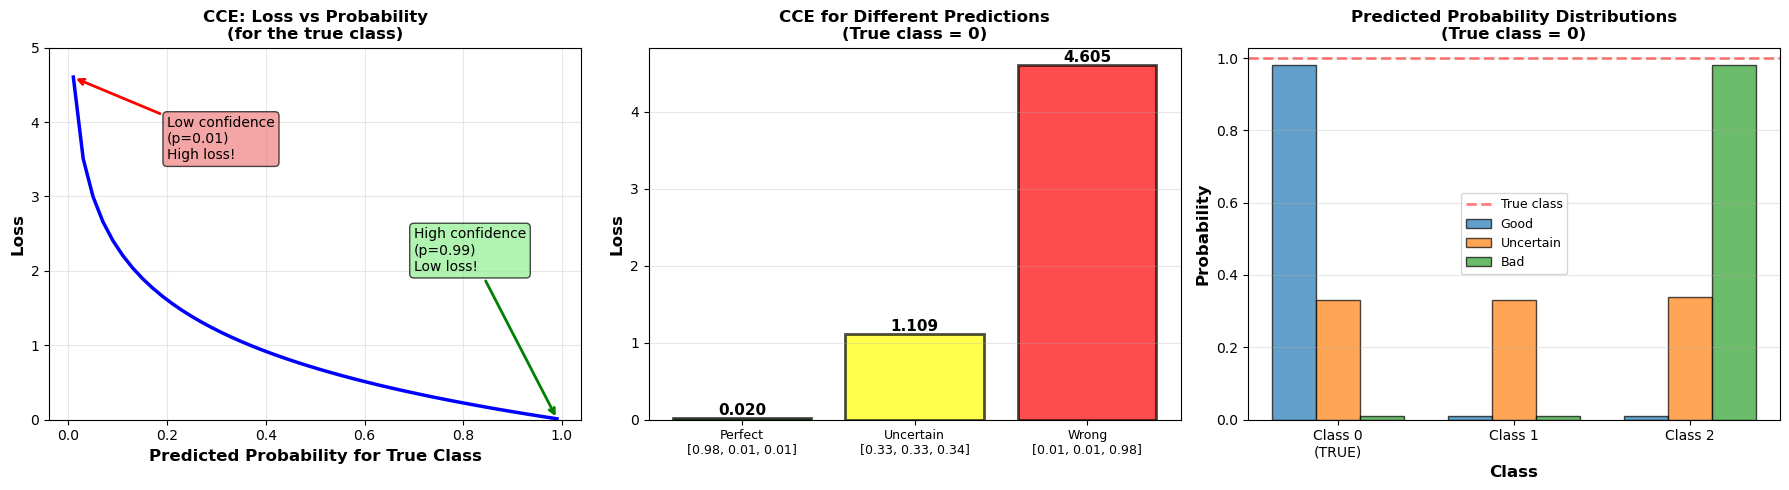


💡 Key Observations:
   • Loss is low when probability for TRUE class is high
   • Loss is high when probability for TRUE class is low
   • Network should put most probability mass on correct class
   • Softmax ensures all probabilities sum to 1


In [13]:
# Visualize Categorical Cross-Entropy

print("\n📈 VISUALIZING CATEGORICAL CROSS-ENTROPY\n")

# Example: 3 classes for simplicity
num_classes = 3
predictions_range = np.linspace(0.01, 0.99, 50)

# Calculate loss when true class is class 0
losses_for_class_0 = -np.log(predictions_range)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Loss vs prediction for true class
axes[0].plot(predictions_range, losses_for_class_0, 'b-', linewidth=2.5)
axes[0].set_xlabel('Predicted Probability for True Class', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12, fontweight='bold')
axes[0].set_title('CCE: Loss vs Probability\n(for the true class)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim([0, 5])

# Annotations
axes[0].annotate('High confidence\n(p=0.99)\nLow loss!', xy=(0.99, 0.01), xytext=(0.7, 2),
                arrowprops=dict(arrowstyle='->', color='green', lw=2),
                fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
axes[0].annotate('Low confidence\n(p=0.01)\nHigh loss!', xy=(0.01, 4.6), xytext=(0.2, 3.5),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=10, bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

# Plot 2: Example probability distributions
scenarios = ['Perfect\n[0.98, 0.01, 0.01]', 'Uncertain\n[0.33, 0.33, 0.34]', 'Wrong\n[0.01, 0.01, 0.98]']
probs_scenarios = [
    [0.98, 0.01, 0.01],  # Confident and correct (true class is 0)
    [0.33, 0.33, 0.34],  # Uncertain
    [0.01, 0.01, 0.98],  # Confident but wrong
]
true_label = [1, 0, 0]  # True class is 0

losses = []
for probs in probs_scenarios:
    loss = -np.log(probs[0])  # Loss for true class (class 0)
    losses.append(loss)

colors = ['green', 'yellow', 'red']
bars = axes[1].bar(range(3), losses, color=colors, edgecolor='black', linewidth=2, alpha=0.7)
axes[1].set_xticks(range(3))
axes[1].set_xticklabels(scenarios, fontsize=9)
axes[1].set_ylabel('Loss', fontsize=12, fontweight='bold')
axes[1].set_title('CCE for Different Predictions\n(True class = 0)', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for bar, loss in zip(bars, losses):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{loss:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 3: Probability distribution visualization
x_pos = np.arange(3)
width = 0.25

for i, (probs, scenario) in enumerate(zip(probs_scenarios, ['Good', 'Uncertain', 'Bad'])):
    offset = (i - 1) * width
    axes[2].bar(x_pos + offset, probs, width, label=scenario, alpha=0.7, edgecolor='black')

axes[2].axhline(y=true_label[0], color='red', linestyle='--', linewidth=2, alpha=0.5, label='True class')
axes[2].set_ylabel('Probability', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Class', fontsize=12, fontweight='bold')
axes[2].set_title('Predicted Probability Distributions\n(True class = 0)', fontsize=12, fontweight='bold')
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(['Class 0\n(TRUE)', 'Class 1', 'Class 2'])
axes[2].legend(fontsize=9)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('cce_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 Key Observations:")
print("   • Loss is low when probability for TRUE class is high")
print("   • Loss is high when probability for TRUE class is low")
print("   • Network should put most probability mass on correct class")
print("   • Softmax ensures all probabilities sum to 1")

### 💡 When to Use Categorical Cross-Entropy

**✅ Use CCE for:**
- Multi-class classification (3+ classes)
- When each sample belongs to exactly ONE class
- Use with softmax activation in output layer
- Examples: MNIST digits, ImageNet, language classification

**❌ Don't use CCE for:**
- Regression problems (use MSE)
- Binary classification (use BCE - it's simpler)
- Multi-label problems where samples can have multiple classes

**⚠️ Things to Watch Out For:**
- Labels must be one-hot encoded
- Predictions must sum to 1 (use softmax!)
- Use epsilon clipping to prevent log(0) errors
- For many classes, consider label smoothing to prevent overconfidence

---
## 📊 Part 5: Choosing the Right Loss Function

### 🗺️ Decision Guide

```
What's your task?
│
├─ Predicting CONTINUOUS VALUES (numbers)
│  └─> Use Mean Squared Error (MSE)
│     Examples: House prices, temperature, age
│
├─ Classifying into 2 CLASSES
│  └─> Use Binary Cross-Entropy (BCE)
│     Examples: Spam/Not Spam, Cat/Dog, Fraud/Legitimate
│     Output: Sigmoid activation
│
└─ Classifying into 3+ CLASSES
   └─> Use Categorical Cross-Entropy (CCE)
      Examples: Digit recognition (0-9), Image classification
      Output: Softmax activation
```

### 📋 Quick Reference Table

| Loss Function | Problem Type | Output Activation | Output Range | Labels Format |
|---------------|--------------|-------------------|--------------|---------------|
| **MSE** | Regression | Linear (none) | Any real number | Continuous values |
| **BCE** | Binary Classification | Sigmoid | 0 to 1 | 0 or 1 |
| **CCE** | Multi-class Classification | Softmax | 0 to 1 (sum=1) | One-hot vectors |

In [14]:
# Create a comprehensive comparison of all loss functions

print("\n📊 COMPREHENSIVE LOSS FUNCTION COMPARISON\n")
print("="*80)

# Example 1: Regression problem
print("\n1️⃣  REGRESSION PROBLEM: Predicting House Prices")
print("-"*80)
actual_prices = np.array([300000, 450000, 250000, 550000])
predicted_prices = np.array([310000, 445000, 265000, 530000])

mse = mean_squared_error(actual_prices, predicted_prices)
print(f"Actual prices:    {actual_prices}")
print(f"Predicted prices: {predicted_prices}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root MSE (RMSE):    ${np.sqrt(mse):,.2f}")
print("✅ Use: MSE (measuring continuous values)")

# Example 2: Binary classification
print("\n" + "="*80)
print("\n2️⃣  BINARY CLASSIFICATION: Email Spam Detection")
print("-"*80)
actual_labels_binary = np.array([1, 0, 1, 0, 1])
predicted_probs_binary = np.array([0.92, 0.08, 0.87, 0.15, 0.94])

bce = binary_cross_entropy(actual_labels_binary, predicted_probs_binary)
print(f"Actual labels (1=Spam, 0=Not): {actual_labels_binary}")
print(f"Predicted probabilities:       {predicted_probs_binary}")
print(f"Binary Cross-Entropy: {bce:.4f}")
accuracy = np.mean((predicted_probs_binary > 0.5) == actual_labels_binary) * 100
print(f"Accuracy: {accuracy:.1f}%")
print("✅ Use: Binary Cross-Entropy (2 classes)")

# Example 3: Multi-class classification
print("\n" + "="*80)
print("\n3️⃣  MULTI-CLASS CLASSIFICATION: Digit Recognition (0-9)")
print("-"*80)

# 3 samples, 4 classes (simplified for display)
actual_labels_multi = np.array([
    [1, 0, 0, 0],  # Class 0
    [0, 1, 0, 0],  # Class 1
    [0, 0, 0, 1],  # Class 3
])

# Simulated predictions (after softmax)
predicted_probs_multi = np.array([
    [0.88, 0.05, 0.04, 0.03],  # Confident it's class 0
    [0.02, 0.91, 0.04, 0.03],  # Confident it's class 1
    [0.03, 0.04, 0.02, 0.91],  # Confident it's class 3
])

cce = categorical_cross_entropy(actual_labels_multi, predicted_probs_multi)
print(f"Number of classes: 4")
print(f"Number of samples: 3")
print(f"\nTrue classes: {np.argmax(actual_labels_multi, axis=1)}")
print(f"Predicted classes: {np.argmax(predicted_probs_multi, axis=1)}")
print(f"\nCategorical Cross-Entropy: {cce:.4f}")
accuracy_multi = np.mean(np.argmax(predicted_probs_multi, axis=1) == np.argmax(actual_labels_multi, axis=1)) * 100
print(f"Accuracy: {accuracy_multi:.1f}%")
print("✅ Use: Categorical Cross-Entropy (3+ classes)")

print("\n" + "="*80)
print("\n💡 KEY TAKEAWAY:")
print("   Different problems need different loss functions!")
print("   Choose based on your task type, not personal preference.")
print("="*80)


📊 COMPREHENSIVE LOSS FUNCTION COMPARISON


1️⃣  REGRESSION PROBLEM: Predicting House Prices
--------------------------------------------------------------------------------
Actual prices:    [300000 450000 250000 550000]
Predicted prices: [310000 445000 265000 530000]
Mean Squared Error: 187500000.00
Root MSE (RMSE):    $13,693.06
✅ Use: MSE (measuring continuous values)


2️⃣  BINARY CLASSIFICATION: Email Spam Detection
--------------------------------------------------------------------------------
Actual labels (1=Spam, 0=Not): [1 0 1 0 1]
Predicted probabilities:       [0.92 0.08 0.87 0.15 0.94]
Binary Cross-Entropy: 0.1061
Accuracy: 100.0%
✅ Use: Binary Cross-Entropy (2 classes)


3️⃣  MULTI-CLASS CLASSIFICATION: Digit Recognition (0-9)
--------------------------------------------------------------------------------
Number of classes: 4
Number of samples: 3

True classes: [0 1 3]
Predicted classes: [0 1 3]

Categorical Cross-Entropy: 0.1055
Accuracy: 100.0%
✅ Use: Categorical Cro

---
## 🗺️ Part 6: Loss Landscapes

### 🏔️ What is a Loss Landscape?

Imagine the loss function as a **terrain** or **landscape**:
- **Height**: Loss value (higher = worse predictions)
- **Position**: Different weight configurations
- **Valleys**: Areas of low loss (good weights)
- **Peaks**: Areas of high loss (bad weights)
- **Goal**: Find the lowest valley (minimize loss)

Training is like hiking downhill to find the lowest point!


🏔️ VISUALIZING LOSS LANDSCAPE



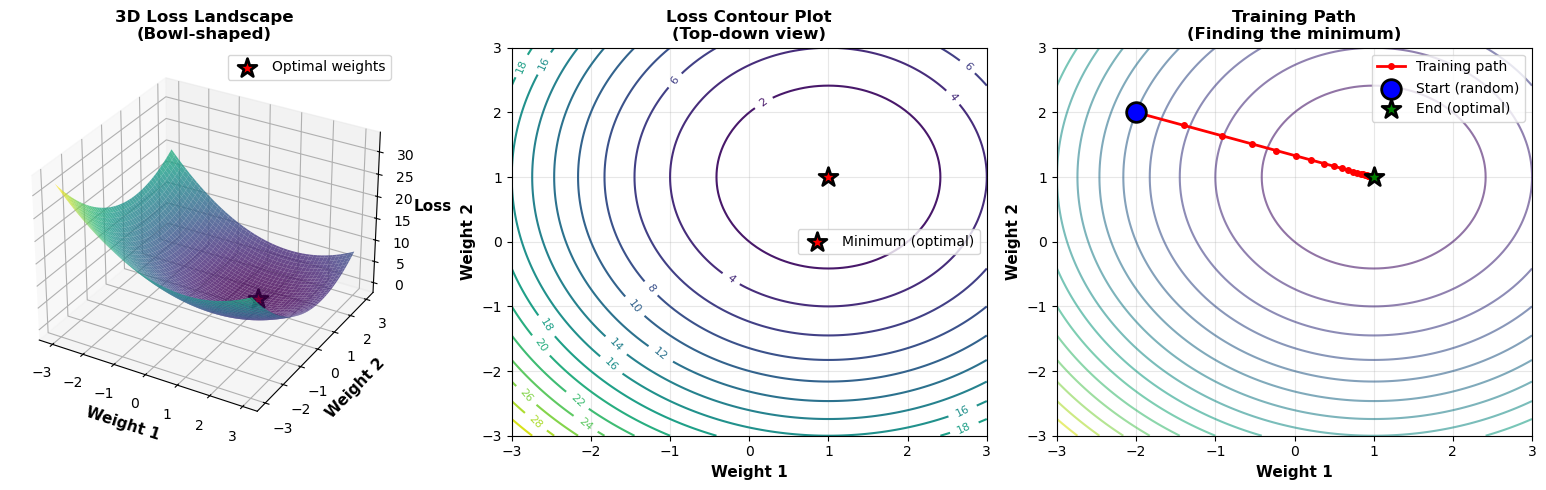


💡 Key Concepts:
   • Loss landscape = terrain of all possible weight combinations
   • Valleys = good weights (low loss)
   • Peaks = bad weights (high loss)
   • Training = navigating from random start to lowest valley
   • Gradient = direction of steepest ascent (we go opposite direction!)

   In real networks: millions of dimensions, complex landscapes!


In [15]:
# Visualize a simple loss landscape

print("\n🏔️ VISUALIZING LOSS LANDSCAPE\n")

# Create a simple 2D loss landscape
# Imagine we have only 2 weights: w1 and w2

# Create a grid of weight values
w1 = np.linspace(-3, 3, 100)
w2 = np.linspace(-3, 3, 100)
W1, W2 = np.meshgrid(w1, w2)

# Define a simple loss function (paraboloid - bowl shape)
# Loss is minimized when both weights are at (1, 1)
Loss = (W1 - 1)**2 + (W2 - 1)**2

# Create 3D visualization
fig = plt.figure(figsize=(16, 5))

# Plot 1: 3D surface
ax1 = fig.add_subplot(131, projection='3d')
surf = ax1.plot_surface(W1, W2, Loss, cmap='viridis', alpha=0.8, edgecolor='none')
ax1.set_xlabel('Weight 1', fontsize=11, fontweight='bold')
ax1.set_ylabel('Weight 2', fontsize=11, fontweight='bold')
ax1.set_zlabel('Loss', fontsize=11, fontweight='bold')
ax1.set_title('3D Loss Landscape\n(Bowl-shaped)', fontsize=12, fontweight='bold')

# Mark the minimum
ax1.scatter([1], [1], [0], color='red', s=200, marker='*', 
           edgecolors='black', linewidth=2, zorder=10, label='Optimal weights')
ax1.legend()

# Plot 2: Contour plot (top-down view)
ax2 = fig.add_subplot(132)
contours = ax2.contour(W1, W2, Loss, levels=20, cmap='viridis')
ax2.clabel(contours, inline=True, fontsize=8)
ax2.scatter([1], [1], color='red', s=200, marker='*', 
           edgecolors='black', linewidth=2, zorder=10, label='Minimum (optimal)')
ax2.set_xlabel('Weight 1', fontsize=11, fontweight='bold')
ax2.set_ylabel('Weight 2', fontsize=11, fontweight='bold')
ax2.set_title('Loss Contour Plot\n(Top-down view)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Plot 3: Show a path from random start to minimum
ax3 = fig.add_subplot(133)
contours = ax3.contour(W1, W2, Loss, levels=20, cmap='viridis', alpha=0.6)
ax3.set_xlabel('Weight 1', fontsize=11, fontweight='bold')
ax3.set_ylabel('Weight 2', fontsize=11, fontweight='bold')
ax3.set_title('Training Path\n(Finding the minimum)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Simulate a training path (gradient descent)
# Start from a random point
start_w1, start_w2 = -2, 2
current_w1, current_w2 = start_w1, start_w2
path_w1, path_w2 = [current_w1], [current_w2]

# Take steps toward the minimum
learning_rate = 0.1
for i in range(30):
    # Gradient (derivative of loss with respect to weights)
    grad_w1 = 2 * (current_w1 - 1)
    grad_w2 = 2 * (current_w2 - 1)
    
    # Update weights (move opposite to gradient - downhill!)
    current_w1 = current_w1 - learning_rate * grad_w1
    current_w2 = current_w2 - learning_rate * grad_w2
    
    path_w1.append(current_w1)
    path_w2.append(current_w2)

# Plot the path
ax3.plot(path_w1, path_w2, 'r-', linewidth=2, marker='o', markersize=4, label='Training path')
ax3.scatter([start_w1], [start_w2], color='blue', s=200, marker='o', 
           edgecolors='black', linewidth=2, zorder=10, label='Start (random)')
ax3.scatter([1], [1], color='green', s=200, marker='*', 
           edgecolors='black', linewidth=2, zorder=10, label='End (optimal)')
ax3.legend()

plt.tight_layout()
plt.savefig('loss_landscape.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 Key Concepts:")
print("   • Loss landscape = terrain of all possible weight combinations")
print("   • Valleys = good weights (low loss)")
print("   • Peaks = bad weights (high loss)")
print("   • Training = navigating from random start to lowest valley")
print("   • Gradient = direction of steepest ascent (we go opposite direction!)")
print("\n   In real networks: millions of dimensions, complex landscapes!")

---
## 🎯 Part 7: Common Mistakes and Pitfalls

Let's learn from common errors!

In [16]:
print("⚠️  COMMON MISTAKES WITH LOSS FUNCTIONS\n")
print("="*70)

# Mistake #1: Using wrong loss for the task
print("\n❌ MISTAKE #1: Using Wrong Loss Function")
print("-"*70)
print("\nBad: Using MSE for classification")
print("   Problem: MSE doesn't work well with probabilities")
print("   It can give misleading gradients for learning")
print("\nGood: Use Cross-Entropy for classification")
print("   Binary class → Binary Cross-Entropy")
print("   Multi-class → Categorical Cross-Entropy")

# Mistake #2: Not matching loss with output activation
print("\n" + "="*70)
print("\n❌ MISTAKE #2: Mismatched Output Activation")
print("-"*70)
print("\nCommon mismatches:")
print("   ❌ BCE with linear output (needs sigmoid!)")
print("   ❌ CCE with sigmoid output (needs softmax!)")
print("   ❌ MSE with softmax output (just use linear!)")
print("\nCorrect pairings:")
print("   ✅ MSE + Linear (or no activation)")
print("   ✅ BCE + Sigmoid")
print("   ✅ CCE + Softmax")

# Mistake #3: Forgetting to clip predictions
print("\n" + "="*70)
print("\n❌ MISTAKE #3: Not Clipping Predictions (Numerical Instability)")
print("-"*70)

# Demonstrate the problem
print("\nDemonstration of log(0) error:")
try:
    bad_prediction = 0.0
    loss = -np.log(bad_prediction)  # log(0) is undefined!
    print(f"Loss: {loss}")
except:
    print("ERROR: log(0) = -inf (mathematical error!)")

print("\nSolution: Clip predictions to avoid log(0)")
epsilon = 1e-15
safe_prediction = np.clip(0.0, epsilon, 1-epsilon)
loss = -np.log(safe_prediction)
print(f"Clipped prediction: {safe_prediction}")
print(f"Loss: {loss:.2f} (finite and safe!)")
print("\n💡 Always clip predictions: np.clip(pred, 1e-15, 1-1e-15)")

# Mistake #4: Not normalizing/scaling targets for MSE
print("\n" + "="*70)
print("\n❌ MISTAKE #4: Large MSE Values (Scale Issues)")
print("-"*70)
print("\nProblem: Predicting house prices without scaling")
actual_prices = np.array([300000, 450000, 250000])
predicted_prices = np.array([310000, 445000, 260000])
mse = mean_squared_error(actual_prices, predicted_prices)
print(f"Actual: {actual_prices}")
print(f"Predicted: {predicted_prices}")
print(f"MSE: {mse:,.0f} (HUGE number!)")
print("   Problem: Large loss values can cause training instability")

print("\nSolution: Scale/normalize the targets")
# Scale prices to reasonable range
scaled_actual = actual_prices / 100000  # Divide by 100k
scaled_predicted = predicted_prices / 100000
scaled_mse = mean_squared_error(scaled_actual, scaled_predicted)
print(f"Scaled actual: {scaled_actual}")
print(f"Scaled predicted: {scaled_predicted}")
print(f"Scaled MSE: {scaled_mse:.6f} (much better!)")
print("\n💡 Always normalize/scale your data before training!")

print("\n" + "="*70)

⚠️  COMMON MISTAKES WITH LOSS FUNCTIONS


❌ MISTAKE #1: Using Wrong Loss Function
----------------------------------------------------------------------

Bad: Using MSE for classification
   Problem: MSE doesn't work well with probabilities
   It can give misleading gradients for learning

Good: Use Cross-Entropy for classification
   Binary class → Binary Cross-Entropy
   Multi-class → Categorical Cross-Entropy


❌ MISTAKE #2: Mismatched Output Activation
----------------------------------------------------------------------

Common mismatches:
   ❌ BCE with linear output (needs sigmoid!)
   ❌ CCE with sigmoid output (needs softmax!)
   ❌ MSE with softmax output (just use linear!)

Correct pairings:
   ✅ MSE + Linear (or no activation)
   ✅ BCE + Sigmoid
   ✅ CCE + Softmax


❌ MISTAKE #3: Not Clipping Predictions (Numerical Instability)
----------------------------------------------------------------------

Demonstration of log(0) error:
Loss: inf

Solution: Clip predictions to avoid 

/var/folders/98/5zng120j50n14r9zjqftvvq00000gn/T/ipykernel_16199/2815718563.py:36: RuntimeWarning: divide by zero encountered in log
  loss = -np.log(bad_prediction)  # log(0) is undefined!


---
## 📚 Summary and Key Takeaways

### 🎉 What We Learned Today:

1. **Why Loss Functions?**
   - Measure how wrong predictions are
   - Turn errors into a single number
   - Guide network learning
   - Lower loss = better predictions

2. **Mean Squared Error (MSE)**:
   - Formula: `MSE = (1/n) × Σ(pred - actual)²`
   - Use for: Regression (continuous values)
   - Penalizes large errors heavily
   - Sensitive to outliers

3. **Binary Cross-Entropy (BCE)**:
   - Formula: `BCE = -[y×log(p) + (1-y)×log(1-p)]`
   - Use for: Binary classification (2 classes)
   - Pair with: Sigmoid activation
   - Heavily penalizes confident mistakes

4. **Categorical Cross-Entropy (CCE)**:
   - Formula: `CCE = -ΣΣ y×log(p)`
   - Use for: Multi-class classification (3+ classes)
   - Pair with: Softmax activation
   - Works with one-hot encoded labels

5. **Choosing the Right Loss**:
   - Regression → MSE
   - Binary classification → BCE
   - Multi-class classification → CCE

6. **Loss Landscapes**:
   - Visualization of all possible weight configurations
   - Training = finding the lowest valley
   - Gradient = direction to move

7. **Common Mistakes**:
   - Using wrong loss for task
   - Mismatched output activation
   - Not clipping predictions (numerical instability)
   - Not scaling data for MSE

### 🔮 What's Next?

Now we can:
- ✅ Make predictions (forward propagation)
- ✅ Measure how wrong we are (loss functions)

**The Big Question**: How do we actually IMPROVE the predictions?

**The Answer**: Backpropagation! 🔙

In **Notebook 7: Backpropagation**, we'll learn:
- How to calculate gradients (derivatives of loss)
- How to update weights to reduce loss
- The chain rule and how it powers deep learning
- Implementing backpropagation from scratch

### 💪 Practice Challenge:

Before moving on, try:
1. Implement MAE (Mean Absolute Error): `MAE = (1/n) × Σ|pred - actual|`
2. Compare MAE vs MSE on the same dataset
3. Create a visualization showing how different loss functions behave
4. Try using the wrong loss function and see what happens

---

**Remember**: Loss functions are the report card for your neural network. They tell you exactly how good (or bad) your predictions are. In the next notebook, we'll learn how to use this information to actually improve the network! 🚀

Ready to learn the magic of backpropagation? Let's go! 🎯